In [13]:
import pandas as pd
import numpy as np
from data_loader import get_reviews
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA_PATH = pathlib.Path('data')

In [ ]:
path = DATA_PATH / "matched_beer_data/ratings_with_text_ba.txt"

df_beer = get_reviews(path)
df_beer.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,4.5,3.25,3.75,3.75,3.91,This was a 12 oz bottle poured into a snifter....,True
1,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1357729200,AgentMunky,agentmunky.409755,4.0,3.75,3.5,3.5,3.75,3.64,Poured from a 12 ounce bottle into a pilsner g...,True
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1353150000,ferrari29,ferrari29.320392,3.0,3.5,2.5,2.5,2.5,2.77,Beer poured from bottle into a Nonic shaped pi...,True
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1342260000,OtherShoe2,othershoe2.233642,4.0,3.5,4.0,3.5,4.0,3.68,Pours a rich brownish red with some chill haze...,True
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1335607200,brentk56,brentk56.6284,4.5,3.0,3.5,2.5,2.5,2.84,Appearance: These Strangford Lough beers pour ...,True


In [8]:
df_beer["beer_name"].value_counts()

beer_name
Trappistes Rochefort 10           2968
Brooklyn Black Chocolate Stout    2861
Delirium Tremens                  1773
AleSmith Speedway Stout           1761
Titan IPA                         1513
                                  ... 
Scorned Hooker                       1
1816 Black Lager                     1
3 Star Pale Ale                      1
Urhell                               1
Ghost Of Rita                        1
Name: count, Length: 26448, dtype: int64

In [9]:
# Let's load from BeerAdvocate, RateBeer and matched_beer_data the users.csv

users_ba = pd.read_csv(DATA_PATH / "BeerAdvocate/users.csv")
users_ma = pd.read_csv(DATA_PATH / "matched_beer_data/users.csv")
users_rb = pd.read_csv(DATA_PATH / "RateBeer/users.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data\\BeerAdvocate\\users.csv'

In [ ]:
# Just display amount of rows and columns

print("BeerAdvocate shape: {} rows, {} columns".format(*users_ba.shape))
print("Matched shape: {} rows, {} columns".format(*users_ma.shape))
print("RateBeer shape: {} rows, {} columns".format(*users_rb.shape))

print("Columns of BA: {}".format(users_ba.columns))
print("Columns of MA: {}".format(users_ma.columns))
print("Columns of RB: {}".format(users_rb.columns))

BeerAdvocate shape: 153704 rows, 6 columns
Matched shape: 3021 rows, 13 columns
RateBeer shape: 70174 rows, 5 columns
Columns of BA: Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
Columns of MA: Index(['ba', 'ba.1', 'ba.2', 'ba.3', 'ba.4', 'ba.5', 'ba.6', 'rb', 'rb.1',
       'rb.2', 'rb.3', 'rb.4', 'rb.5'],
      dtype='object')
Columns of RB: Index(['nbr_ratings', 'user_id', 'user_name', 'joined', 'location'], dtype='object')


In [ ]:
users_ba.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [ ]:
users_ma.head()

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
4,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing


=> matched users always have the same user_name in ba and rb => we can get rid of one column

=> if location NAN then joined NAN

In [ ]:
# See how many users are in common between the two datasets BA and RB
users_ba_rb = pd.merge(users_ba, users_rb, on=["user_name"], how="inner")

users_ba_rb.head()

,nbr_ratings_x,nbr_reviews,user_id_x,user_name,joined_x,location_x,nbr_ratings_y,user_id_y,joined_y,location_y
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington",3,101495,1.265800e+09,"United States, Washington"
1,1866,23,rochefortchris.697017,RochefortChris,1.349172e+09,"United States, North Carolina",8,213410,1.345975e+09,"United States, South Carolina"
2,6306,6306,brentk56.6284,brentk56,1.084442e+09,"United States, North Carolina",1,26838,1.125742e+09,"United States, North Carolina"
3,6260,4734,emerge077.17949,emerge077,1.113646e+09,"United States, Illinois",40,46216,1.165576e+09,"United States, Illinois"
4,1851,10,buckyp.435592,buckyp,1.267960e+09,"United States, South Carolina",20,68888,1.201864e+09,"United States, Georgia"


In [ ]:
# Remove if missing data
users_ba_rb = users_ba_rb.dropna()

print("Shape of filtered BA and RB: {} rows, {} columns".format(*users_ba_rb.shape))

Shape of filtered BA and RB: 3139 rows, 10 columns


In [ ]:
# Remove lines from users_ba_rb if the user_name is in users_ma["ba.6"]
names_in_ma = users_ma["ba.6"].tolist()[1:]

filtered_users_ba_rb = users_ba_rb.copy()
filtered_users_ba_rb["user_name"] = filtered_users_ba_rb["user_name"].str.lower()
filtered_users_ba_rb = filtered_users_ba_rb[
    ~filtered_users_ba_rb["user_name"].isin(names_in_ma)
]

print(filtered_users_ba_rb.shape)

(660, 10)


to replicated matched dataset, we did inner join + removed NANs but we have more in our filtered dataset than the matched dataset. We try to udnerstand why.

-> 542 lines in matched but not in filtered

-> 600 lines in filtered but not in matched

In [ ]:
# remove lines from users_ma if the user_name is in users_ba_rb

names_filter = users_ba["user_name"].to_list()
names_filter = [str(name).lower() for name in names_filter]

filtered_users_ma = users_ma[~users_ma["ba.6"].isin(names_filter)]
print(filtered_users_ma.shape)

(1, 13)


=> all users in matched are in users_rb and users_ba 

In [12]:
def get_reviews(file, n_features):
    with open(file, "r", encoding="utf8") as f:
        lines = f.readlines()
    lines_without_breaks = [line[:-1] for line in lines if line != "\n"]
    data = [line[line.find(": ") + 2 :] for line in lines_without_breaks]
    data = np.array(data, dtype="object")
    features = [line[0 : line.find(": ")] for line in lines[:n_features]]
    reviews = data.reshape((-1, n_features))
    reviews_df = pd.DataFrame(reviews, columns=features)
    return reviews_df

Upon looking through the data, we notice that the different text files have a different number of attributes which we give to the `get_reviews` function as `n_features`

In [64]:
# make dataframes of the text files

ratings_ba = get_reviews(DATA_PATH / "matched_beer_data/ratings_ba.txt", 17)
ratings_rb = get_reviews(DATA_PATH / "matched_beer_data/ratings_rb.txt", 16)
ratings_ba_text = get_reviews(
    DATA_PATH / "matched_beer_data/ratings_with_text_ba.txt", 17
)
ratings_rb_text = get_reviews(
    DATA_PATH / "matched_beer_data/ratings_with_text_rb.txt", 16
)

We now want to understand the difference with these datasets:

1. what is the additional columns in ba: `review` which is a bool
2. what is the difference between the datasets with and without text:

Our hypothesis is that the ratings files from the `matched_beer_data` were made from the matched users. The files from BeerAdvocate and RateBeer are very large so we will try not to work with them.

In [ ]:
# comparison of dataframes sizes

print("Shape of BA: {} rows, {} columns".format(*ratings_ba.shape))
print("Shape of RB: {} rows, {} columns".format(*ratings_rb.shape))
print("Shape of BA with text: {} rows, {} columns".format(*ratings_ba_text.shape))
print("Shape of RB with text: {} rows, {} columns".format(*ratings_rb_text.shape))

Shape of BA: 955968 rows, 17 columns
Shape of RB: 1020638 rows, 16 columns
Shape of BA with text: 289025 rows, 17 columns
Shape of RB with text: 1020599 rows, 16 columns


In [ ]:
# remove lines from users_ma if the user_name is in ratings_ba or ratings_rb

names_filter_ba = ratings_ba["user_name"].to_list()
names_filter_ba = [str(name).lower() for name in names_filter]
names_filter_rb = ratings_rb["user_name"].to_list()
names_filter_rb = [str(name).lower() for name in names_filter]

filtered_users_ba = users_ma[~users_ma["ba.6"].isin(names_filter_ba)]
filtered_users_rb = users_ma[~users_ma["ba.6"].isin(names_filter_rb)]

print("Size of unfiltered users.ma: {}".format(users_ma.shape))
print("Size of users.ma filtered with ba: {}".format(filtered_users_ba.shape))
print("Size of users.ma filtered with rb: {}".format(filtered_users_rb.shape))

Size of unfiltered users.ma: (3021, 13)
Size of users.ma filtered with ba: (1, 13)
Size of users.ma filtered with rb: (1, 13)


=> if users_ma has users from `ratings_ba` or `ratings_rb`, then they are in both datasets

In [ ]:
# remove lines from ratings_ba if the user_name is in ratings_rb

filtered_ba = ratings_ba[~ratings_ba["user_name"].isin(names_filter_rb)]
print(filtered_ba.shape)

# faire differemment: recuperer list de unique users dans ratings_rb et faire un isin sur ratings_ba

(498657, 17)


=> however the `ratings_ba` and `ratings_rb` have a very different list of user_names

In [ ]:
# See how many users are in common between the ratings_ba and ratings_rb datasets

ratings_ba_rb = pd.merge(ratings_ba, ratings_rb, on=["user_name"], how="inner")
ratings_ba_rb = ratings_ba_rb.dropna()

print("Shape of filtered BA and RB: {} rows, {} columns".format(*ratings_ba_rb.shape))

Shape of filtered BA and RB: 12751036 rows, 32 columns


## Comparison between full RB and matched RB datasets

We not want to understand the similarities between the `ratings.txt` datasets from RateBeer and BeerAdvocate and the matched files (`ratings_ba.txt` and `ratings_rb.txt`). We therefore load the full datasets from RB and BA, then extract a sample for each column and compare it to the matched data through plots and significance testing (ie. t-test)

In [18]:
# get full dataset of ratings RB

full_ratings_rb = get_reviews(DATA_PATH / "RateBeer/ratings.txt", 16)

In [19]:
full_ratings_rb.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.00,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.90,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.60,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.50,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.90,Many thanks for this beer to Erzengel. Pours l...


In [20]:
# Randomly sample a column from the full rb dataset equal to the length of the column in the matched file


def make_sample_rb(col_name):
    col_full = full_ratings_rb[col_name]
    col_rb = ratings_rb[col_name]
    sample = col_full.sample(len(col_rb))
    return sample


# plot the distribution of the column from the full rb dataset and the matched rb dataset


def make_hist(sample, col_rb):
    plt.hist(sample, bins=10, alpha=0.5, label="Full")
    plt.hist(col_rb, bins=10, alpha=0.5, label="RB")
    plt.legend(loc="upper right")
    plt.show()


def make_boxplot(sample, col_rb):
    sns.boxplot(data=[sample, col_rb])
    plt.show()


def make_plots(sample, col_rb, sample_title, col_title):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=False, sharex=False)

    ax[0].hist(sample, bins=10, alpha=0.5, label="Full")
    ax[0].hist(col_rb, bins=10, alpha=0.5, label="RB")
    ax[0].legend(loc="upper right")
    ax[0].set_title(sample_title)

    ax[1] = sns.boxplot(data=[sample, col_rb], ax=ax[1])
    ax[1].set_title(col_title)
    plt.show()

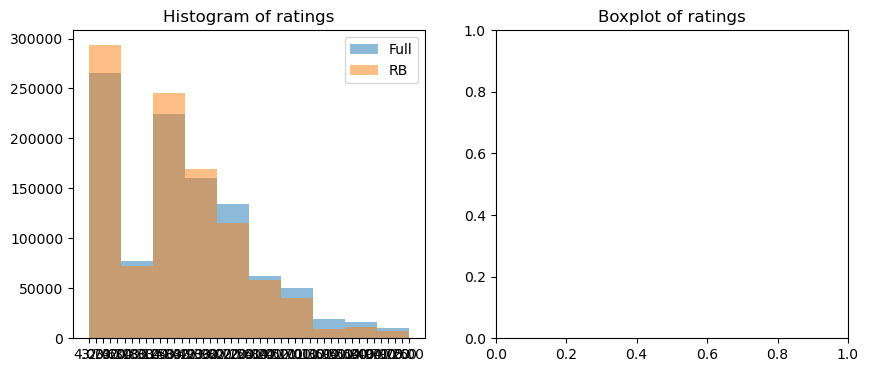

In [21]:
# Compare the ratings

rating_col_full_sample = make_sample_rb("rating")
rating_col_full_sample = rating_col_full_sample.dropna()
rating_col_rb = ratings_rb["rating"]
rating_col_rb = rating_col_rb.dropna()
make_plots(
    rating_col_full_sample, rating_col_rb, "Histogram of ratings", "Boxplot of ratings"
)

In [30]:
rating_col_full_sample = rating_col_full_sample.astype(float)
rating_col_rb = rating_col_rb.astype(float)

# Describe the statistics of the ratings
print("Statistics of the ratings from the full dataset")
print(rating_col_full_sample.describe())

print("Statistics of the ratings from the matched dataset")
print(rating_col_rb.describe())

# Compute the difference in statistics

print("Difference in mean/median: {}".format(rating_col_full_sample.mean() - rating_col_rb.mean()))




Statistics of the ratings from the full dataset
count    1.020638e+06
mean     3.284913e+00
std      6.863852e-01
min      5.000000e-01
25%      3.000000e+00
50%      3.400000e+00
75%      3.700000e+00
max      5.000000e+00
Name: rating, dtype: float64
Statistics of the ratings from the matched dataset
count    1.020638e+06
mean     3.395872e+00
std      5.798052e-01
min      5.000000e-01
25%      3.100000e+00
50%      3.500000e+00
75%      3.800000e+00
max      5.000000e+00
Name: rating, dtype: float64
Difference in mean: -0.11095883163276277
Difference in median: -0.10000000000000009
Difference in 25th percentile: -0.10000000000000009
Difference in 75th percentile: -0.09999999999999964


In [24]:
import scipy.stats as stats

rating_col_full_sample = rating_col_full_sample.astype(float)
rating_col_rb = rating_col_rb.astype(float)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(rating_col_full_sample, rating_col_rb)

print("The t-statistic is {:.2f}".format(t_statistic))
print("The p-value is {:.6e}".format(p_value))

if p_value < 0.05:
    print(
        "The null hypothesis is rejected, the mean rating between the sample and the matched rb is different"
    )
else:
    print(
        "The null hypothesis is accepted, the difference between the rating for the sample and matched rb is not statistically significant"
    )

The t-statistic is -124.76
The p-value is 0.000000e+00
The null hypothesis is rejected, the mean rating between the sample and the matched rb is different


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

ztest_res = ztest(
    rating_col_full_sample.astype(float), rating_col_rb.astype(float), value=0
)
print(ztest_res)

(-124.57489318084514, 0.0)


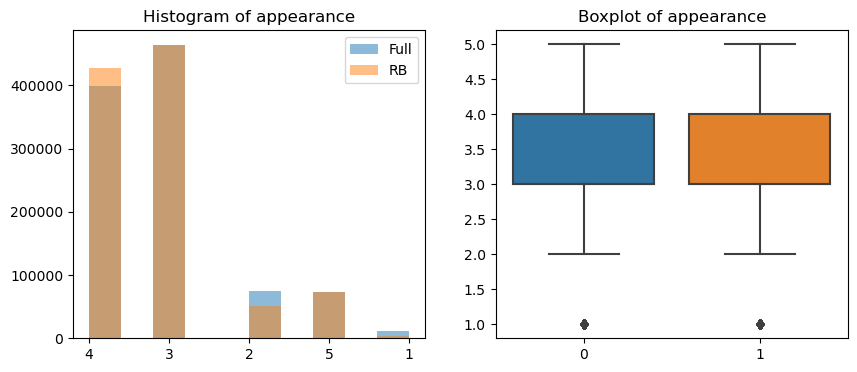

In [ ]:
# Compare the appearance

app_col_full_sample = make_sample_rb("appearance")
app_col_full_sample = app_col_full_sample.dropna()
app_col_rb = ratings_rb["appearance"]
app_col_rb = app_col_rb.dropna()
make_plots(
    app_col_full_sample, app_col_rb, "Histogram of appearance", "Boxplot of appearance"
)

In [ ]:
# Perform the t-test
t_statistic_app, p_value_app = stats.ttest_ind(
    app_col_full_sample.astype(float), app_col_rb.astype(float)
)

print("The t-statistic is {:.2f}".format(t_statistic_app))
print("The p-value is {:.2e}".format(p_value_app))

if p_value_app < 0.05:
    print(
        "The null hypothesis is rejected, the mean appearance rating between the sample and the matched rb is different"
    )
else:
    print(
        "The null hypothesis is accepted, the difference between the appearance rating for the sample and matched rb is not statistically significant"
    )

The t-statistic is -61.41
The p-value is 0.00e+00
The null hypothesis is rejected, the mean appearance rating between the sample and the matched rb is different


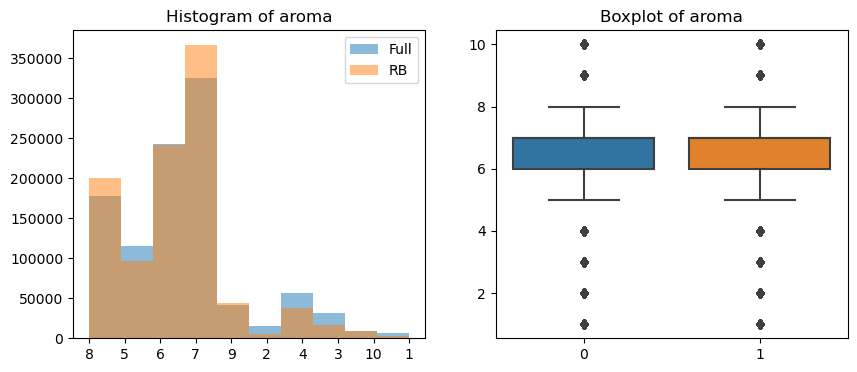

In [ ]:
# Compare the aromas

aroma_col_full_sample = make_sample_rb("aroma")
aroma_col_full_sample = aroma_col_full_sample.dropna()
aroma_col_rb = ratings_rb["aroma"]
aroma_col_rb = aroma_col_rb.dropna()
make_plots(
    aroma_col_full_sample, aroma_col_rb, "Histogram of aroma", "Boxplot of aroma"
)

In [ ]:
# Perform the t-test for aromas
t_statistic_aroma, p_value_aroma = stats.ttest_ind(
    aroma_col_full_sample.astype(float), aroma_col_rb.astype(float)
)

print("The t-statistic is {:.2f}".format(t_statistic_aroma))
print("The p-value is {:.2e}".format(p_value_aroma))

if p_value_aroma < 0.05:
    print(
        "The null hypothesis is rejected, the mean aroma rating between the sample and the matched rb is different"
    )
else:
    print(
        "The null hypothesis is accepted, the difference between the aroma rating for the sample and matched rb is not statistically significant"
    )

The t-statistic is -123.13
The p-value is 0.00e+00
The null hypothesis is rejected, the mean aroma rating between the sample and the matched rb is different


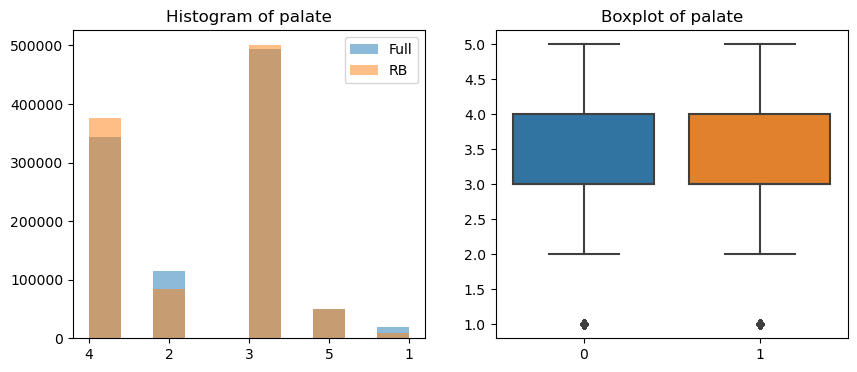

In [ ]:
# Compare the palate ratings

palate_col_full_sample = make_sample_rb("palate")
palate_col_full_sample = palate_col_full_sample.dropna()
palate_col_rb = ratings_rb["palate"]
palate_col_rb = palate_col_rb.dropna()
make_plots(
    palate_col_full_sample, palate_col_rb, "Histogram of palate", "Boxplot of palate"
)

In [ ]:
# Perform the t-test for aromas
t_statistic_pal, p_value_pal = stats.ttest_ind(
    palate_col_full_sample.astype(float), palate_col_rb.astype(float)
)

print("The t-statistic is {:.2f}".format(t_statistic_pal))
print("The p-value is {:.2e}".format(p_value_pal))

if p_value_pal < 0.05:
    print(
        "The null hypothesis is rejected, the mean palate rating between the sample and the matched rb is different"
    )
else:
    print(
        "The null hypothesis is accepted, the difference between the palate rating for the sample and matched rb is not statistically significant"
    )

The t-statistic is -78.94
The p-value is 0.00e+00
The null hypothesis is rejected, the mean palate rating between the sample and the matched rb is different


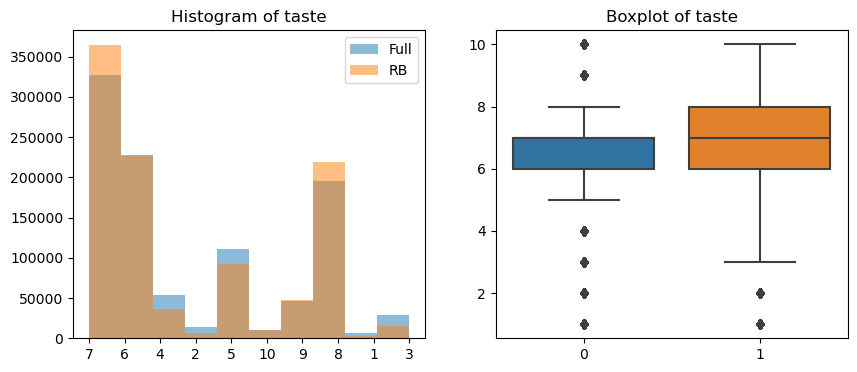

In [ ]:
# Compare the taste ratings

taste_col_full_sample = make_sample_rb("taste")
taste_col_full_sample = taste_col_full_sample.dropna()
taste_col_rb = ratings_rb["taste"]
taste_col_rb = taste_col_rb.dropna()
make_plots(
    taste_col_full_sample, taste_col_rb, "Histogram of taste", "Boxplot of taste"
)

In [ ]:
# Perform the t-test for aromas
t_statistic_taste, p_value_taste = stats.ttest_ind(
    taste_col_full_sample.astype(float), taste_col_rb.astype(float)
)

print("The t-statistic is {:.2f}".format(t_statistic_taste))
print("The p-value is {:.2e}".format(p_value_taste))

if p_value_taste < 0.05:
    print(
        "The null hypothesis is rejected, the mean taste rating between the sample and the matched rb is different"
    )
else:
    print(
        "The null hypothesis is accepted, the difference between the taste rating for the sample and matched rb is not statistically significant"
    )

The t-statistic is -111.17
The p-value is 0.00e+00
The null hypothesis is rejected, the mean taste rating between the sample and the matched rb is different


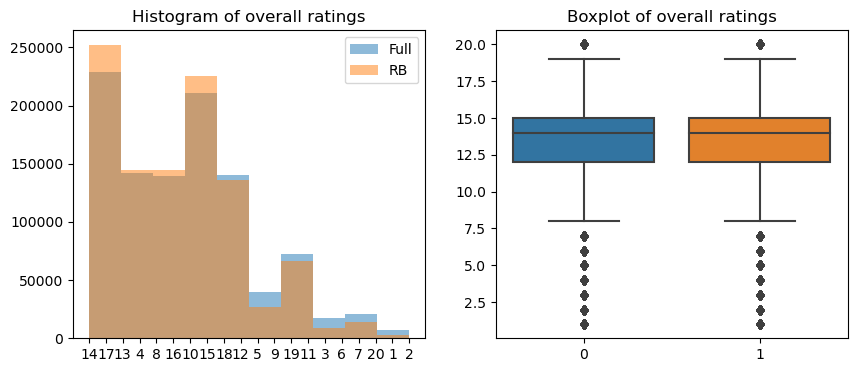

In [ ]:
# Compare the overall ratings

overall_col_full_sample = make_sample_rb("overall")
overall_col_full_sample = overall_col_full_sample.dropna()
overall_col_rb = ratings_rb["overall"]
overall_col_rb = overall_col_rb.dropna()
make_plots(
    overall_col_full_sample,
    overall_col_rb,
    "Histogram of overall ratings",
    "Boxplot of overall ratings",
)

In [ ]:
# Perform the t-test for aromas
t_statistic_overall, p_value_overall = stats.ttest_ind(
    overall_col_full_sample.astype(float), overall_col_rb.astype(float)
)

print("The t-statistic is {:.2f}".format(t_statistic_overall))
print("The p-value is {:.2e}".format(p_value_overall))

if p_value_overall < 0.05:
    print(
        "The null hypothesis is rejected, the mean overall rating between the sample and the matched rb is different"
    )
else:
    print(
        "The null hypothesis is accepted, the difference between the overall rating for the sample and matched rb is not statistically significant"
    )

The t-statistic is -118.73
The p-value is 0.00e+00
The null hypothesis is rejected, the mean overall rating between the sample and the matched rb is different


## Comparison between full BA and matched BA datasets

In [ ]:
# get full dataset of ratings RB

full_ratings_ba = get_reviews(DATA_PATH / "BeerAdvocate/ratings.txt", 17)

In [ ]:
# Randomly sample a column from the full rb dataset equal to the length of the column in the matched file


def make_sample_ba(col_name):
    col_full = full_ratings_ba[col_name]

    col_ba = ratings_ba[col_name]

    sample = col_full.sample(len(col_ba))
    return sample

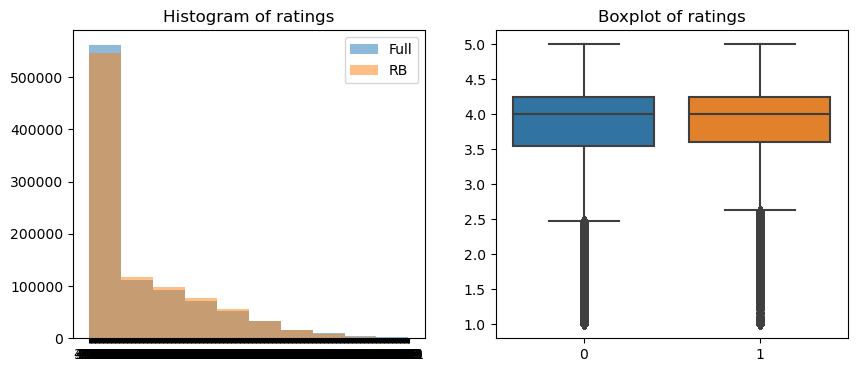

In [ ]:
# Compare the ratings

rating_col_full_sample = make_sample_ba("rating")
rating_col_full_sample = rating_col_full_sample.dropna()
rating_col_ba = ratings_ba["rating"]
rating_col_ba = rating_col_ba.dropna()
make_plots(
    rating_col_full_sample, rating_col_ba, "Histogram of ratings", "Boxplot of ratings"
)

In [ ]:
import scipy.stats as stats

# Perform the t-test for ratings
t_statistic_rating, p_value_rating = stats.ttest_ind(
    rating_col_full_sample.astype(float), rating_col_ba.astype(float)
)

print("The t-statistic is {:.2f}".format(t_statistic_rating))
print("The p-value is {:.2e}".format(p_value_rating))

if p_value_rating < 0.05:
    print(
        "The null hypothesis is rejected, the mean rating between the sample and the matched rb is different"
    )
else:
    print(
        "The null hypothesis is accepted, the difference between the rating for the sample and matched rb is not statistically significant"
    )

The t-statistic is -31.36
The p-value is 9.11e-216
The null hypothesis is rejected, the mean rating rating between the sample and the matched rb is different


In [ ]:
rating_col_full_sample = rating_col_full_sample.astype(float)
rating_col_ba = rating_col_ba.astype(float)

res_rating = t_statistic_rating, p_value_rating = stats.ttest_ind(
    rating_col_full_sample, rating_col_ba
)
print(res_rating)

NameError: name 'rating_col_full_sample' is not defined

In [ ]:
full_ratings_ba.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True


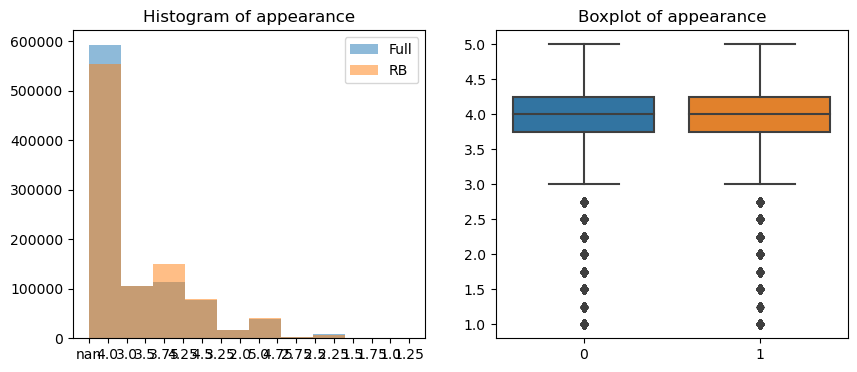

In [ ]:
# Compare the appearance ratings

app_col_full_sample = make_sample_ba("appearance")
app_col_full_sample = app_col_full_sample.dropna()
app_col_ba = ratings_ba["appearance"]
app_col_ba = app_col_ba.dropna()
make_plots(
    app_col_full_sample, app_col_ba, "Histogram of appearance", "Boxplot of appearance"
)

In [ ]:
import scipy.stats as stats

# Perform the t-test for ratings
t_statistic_app, p_value_app = stats.ttest_ind(
    app_col_full_sample.astype(float), app_col_ba.astype(float)
)

print("The t-statistic is {:.2f}".format(t_statistic_app))
print("The p-value is {:.2e}".format(p_value_app))

if p_value_app < 0.05:
    print(
        "The null hypothesis is rejected, the mean appearance rating between the sample and the matched rb is different"
    )
else:
    print(
        "The null hypothesis is accepted, the difference between the appearance rating for the sample and matched rb is not statistically significant"
    )

The t-statistic is nan
The p-value is nan
The null hypothesis is accepted, the difference between the appearance rating for the sample and matched rb is not statistically significant


# Check amount of reviews per beer

In [54]:
# Load
matched_beers = pd.read_csv(DATA_PATH / 'matched_beer_data/beers.csv')
ba_beers = pd.read_csv(DATA_PATH / 'BeerAdvocate/beers.csv')
rb_beers = pd.read_csv(DATA_PATH / 'RateBeer/beers.csv')

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_18594/2137015074.py:2: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  matched_beers = pd.read_csv(DATA_PATH / 'matched_beer_data/beers.csv')


## Plots for matched data

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_18594/856510412.py:1: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  matched_beers = pd.read_csv(DATA_PATH / 'matched_beer_data/beers.csv')


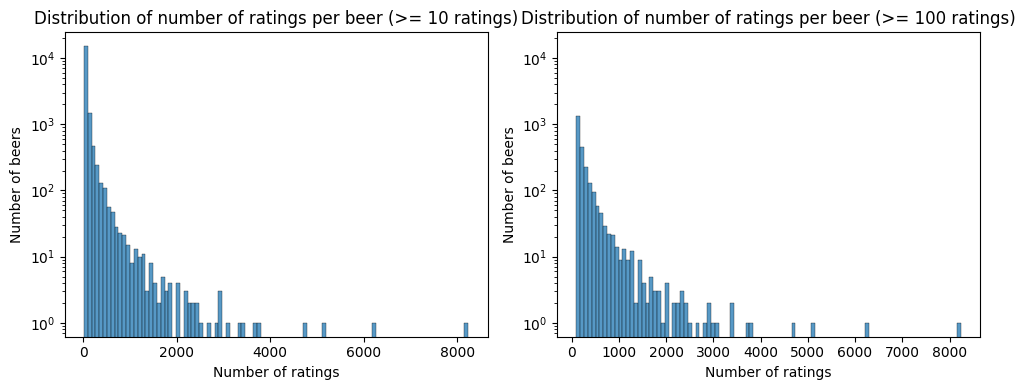

In [50]:
columns_nbr_ratings = matched_beers.iloc[0] == 'nbr_matched_valid_ratings'
# Use the columns_nbr_ratings to get the columns with the number of ratings
columns_nbr_ratings = columns_nbr_ratings[columns_nbr_ratings == True]
nbr_ratings = matched_beers[columns_nbr_ratings.index].iloc[1:].astype(int)

nbr_ratings['total'] = nbr_ratings.sum(axis=1)

df_10_rev = nbr_ratings[nbr_ratings['total'] >= 10].copy()
df_100_rev = nbr_ratings[nbr_ratings['total'] >= 100].copy()
    
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey = False, sharex = False)
sns.histplot(df_10_rev['total'], bins=100, ax=ax[0])
sns.histplot(df_100_rev['total'], bins=100, ax=ax[1])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
# Use same y axis from first plot for both plots
ax[1].set_ylim(ax[0].get_ylim())
ax[0].set_xlabel('Number of ratings')
ax[0].set_ylabel('Number of beers')
ax[1].set_xlabel('Number of ratings')
ax[1].set_ylabel('Number of beers')
ax[0].set_title('Distribution of number of ratings per beer (>= 10 ratings)')
ax[1].set_title('Distribution of number of ratings per beer (>= 100 ratings)')

plt.tight_layout()

plt.show()

## Plots for BeerAdvocate data

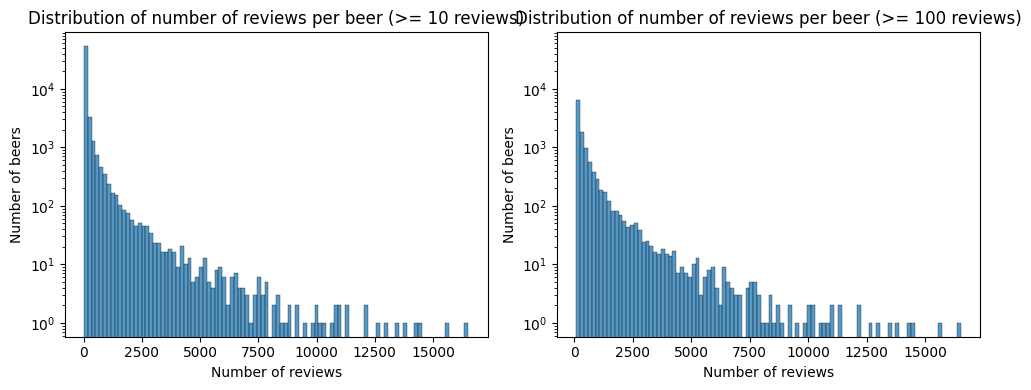

In [63]:
reviews_per_beer = ba_beers['nbr_ratings']

df_10_rev = reviews_per_beer[reviews_per_beer >= 10].copy()
df_100_rev = reviews_per_beer[reviews_per_beer >= 100].copy()

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey =  False, sharex = False)
sns.histplot(df_10_rev, bins=100, ax=ax[0])
sns.histplot(df_100_rev, bins=100, ax=ax[1])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
# Use same y axis from first plot for both plots
ax[1].set_ylim(ax[0].get_ylim())
ax[0].set_xlabel('Number of reviews')
ax[0].set_ylabel('Number of beers')
ax[1].set_xlabel('Number of reviews')
ax[1].set_ylabel('Number of beers')
ax[0].set_title('Distribution of number of reviews per beer (>= 10 reviews)')
ax[1].set_title('Distribution of number of reviews per beer (>= 100 reviews)')
plt.tight_layout()
plt.show()

## Plots for RateBeer data

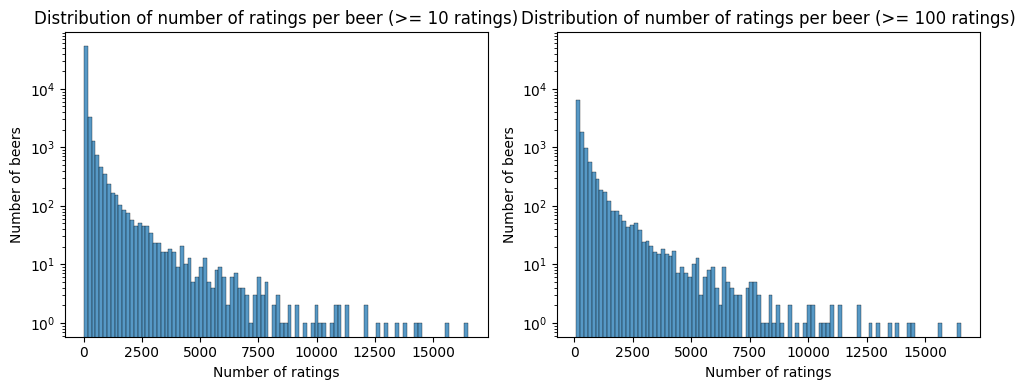

In [62]:
reviews_per_beer = ba_beers['nbr_ratings']

df_10_rev = reviews_per_beer[reviews_per_beer >= 10].copy()
df_100_rev = reviews_per_beer[reviews_per_beer >= 100].copy()
    
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey = False, sharex = False)
sns.histplot(df_10_rev, bins=100, ax=ax[0])
sns.histplot(df_100_rev, bins=100, ax=ax[1])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
# Use same y axis from first plot for both plots
ax[1].set_ylim(ax[0].get_ylim())
ax[0].set_xlabel('Number of ratings')
ax[0].set_ylabel('Number of beers')
ax[1].set_xlabel('Number of ratings')
ax[1].set_ylabel('Number of beers')
ax[0].set_title('Distribution of number of ratings per beer (>= 10 ratings)')
ax[1].set_title('Distribution of number of ratings per beer (>= 100 ratings)')

plt.tight_layout()

plt.show()


# Amount of countries

In [75]:
breweries = pd.read_csv(DATA_PATH / 'matched_beer_data/breweries.csv')

# use first line as column names
breweries.columns = breweries.iloc[0]
# remove first line
breweries = breweries.iloc[1:]

print("Amount of different location of breweries: {}".format(breweries['location'].nunique()[0]))

Amount of different location of breweries: 205


In [78]:
users = pd.read_csv(DATA_PATH / 'matched_beer_data/users.csv')

users.columns = users.iloc[0]
users = users.iloc[1:]

print("Amount of different location of users: {}".format(users['location'].nunique()[0]))

Amount of different location of users: 110
